In [14]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn import metrics
from sklearn.preprocessing import scale

import os
#sklearn.tree의 Decision Tree classifier:분류의사결정나무
from sklearn.tree import DecisionTreeClassifier
#sklearn.tree의 export_graphviz: graphviz패키지가 사용할수 있는.dot 확장자 파일로저장
from sklearn.tree import export_graphviz
#graphviz import:의사결정 나무 모델 시각화 .dot확장자 파일 불러오는 패키지
import graphviz

#pandas describe 생략되는 것 표시
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

In [41]:
b_cancer = pd.read_csv("/home/pirl/Downloads/유방암.csv",engine = 'python',
                        encoding='CP949')
b_cancer.head()

,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [42]:
print(b_cancer.isnull().sum(axis=0))
b_cancer.info()

diagnosis                  0
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (to

In [43]:
np.random.seed(seed=1234)
msk = np.random.rand(b_cancer.shape[0],)<0.7
c_train=b_cancer[msk]
c_test = b_cancer[~msk]
print("train data size: {}".format(c_train.shape))
print("test data size: {}".format(c_test.shape))

train data size: (385, 31)
test data size: (184, 31)


In [44]:
#데이터 구성하기
#데이터분할(train,test 7:3비율로 분할,numpy의 random 함수 이용 방법)
np.random.seed(1234)
#0.7보다 작으면 true, -> train, 아니면 false -> test
msk = np.random.rand(b_cancer.shape[0]) < 0.7
b_train = b_cancer[msk]
b_test = b_cancer[~msk]
#train/test 데이터의 목표변수 설명변수 지정
b_train_y = b_train["diagnosis"]
b_train_x = b_train.drop("diagnosis",axis=1,inplace=False)
b_test_y = b_test["diagnosis"]
b_test_x = b_test.drop("diagnosis",axis=1,inplace=False)
#데이터 크기
print("train data X size: {}".format(b_train_x.shape))
print("train data Y size: {}".format(b_train_y.shape))
print("test data X size: {}".format(b_test_x.shape))
print("test data X size: {}".format(b_test_y.shape))

train data X size: (385, 30)
train data Y size: (385,)
test data X size: (184, 30)
test data X size: (184,)


In [45]:
rf_uncustomized = RandomForestClassifier(random_state=1234)
rf_uncustomized.fit(b_train_x, b_train_y)
# 훈련 데이터 정확도
print("Accucary on training set: {:.3f}".format(rf_uncustomized.score(b_train_x, b_train_y)))
# test 데이터 정확도
print("Accucary on test set: {:.3f}".format(rf_uncustomized.score(b_test_x, b_test_y)))

Accucary on training set: 1.000
Accucary on test set: 0.978


In [46]:
rf_uncustomized

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=1234, verbose=0,
            warm_start=False)

In [47]:
#train 데이터셋 스케일 조정
b_train_x_scaled = scale(b_train_x,axis=0)
#test 데이터셋 스테일 조정
b_test_x_scaled = scale(b_test_x,axis=0)
#스케일이 변경된 x변수 확인
pd.DataFrame(b_train_x_scaled,columns=b_train_x.columns).head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.034153,-2.040907,1.201746,0.913932,1.568430,3.222477,2.556376,2.431039,2.260749,2.388981,2.313143,-0.539984,2.577914,2.279170,-0.172321,1.231183,0.634248,0.579991,1.123777,0.814252,1.856617,-1.340180,2.256284,1.981249,1.369113,2.559731,2.062455,2.222408,2.981240,2.037489
1,1.762845,-0.339344,1.614265,1.818637,-0.814344,-0.520929,-0.062085,0.494636,0.011884,-0.890952,0.445579,-0.845669,0.209500,0.663077,-0.571100,-0.711593,-0.438542,0.198585,-0.800247,-0.113605,1.775545,-0.351425,1.489403,1.870090,-0.341948,-0.457913,-0.174963,1.031413,-0.228790,0.308815
2,1.514299,0.461934,1.495819,1.476241,0.945482,1.007967,1.295044,1.947756,0.964040,-0.396878,1.129958,-0.751146,0.751074,1.069545,-0.256900,0.746029,0.163661,1.307289,0.226137,0.248681,1.480360,-0.006661,1.302141,1.434275,0.575965,1.040829,0.818388,1.886410,1.267837,0.225505
3,-0.530558,-0.815966,-0.441388,-0.544453,2.233850,1.197997,0.808688,0.764469,1.030728,2.005032,-0.262165,-0.566914,-0.329336,-0.292276,0.205058,0.388917,0.114801,-0.114879,0.124810,0.426860,-0.203440,-0.296132,-0.157312,-0.272638,2.122158,1.673337,1.223245,0.852914,1.912964,2.355685
4,1.107587,0.169513,1.071047,1.022497,-0.114236,0.050290,0.254783,0.591041,-0.054803,-0.779339,0.117782,-0.775579,0.110037,0.252126,-0.880544,-0.671614,-0.318224,-0.266207,-0.824089,-0.585379,1.336925,0.339728,1.322948,1.252538,0.567053,-0.010622,0.475853,1.139413,0.314019,-0.000125


In [48]:
rf_scaled = RandomForestClassifier(random_state=1234)
rf_scaled.fit(b_train_x_scaled, b_train_y)
# 훈련 데이터 정확도
print("Accucary on training set: {:.3f}".format(rf_scaled.score(b_train_x_scaled, b_train_y)))
# test 데이터 정확도
print("Accucary on test set: {:.3f}".format(rf_scaled.score(b_test_x_scaled, b_test_y)))

Accucary on training set: 1.000
Accucary on test set: 0.962


#### 스케일을 했을경우 test셋에서의 정확도가 낫아 졌다. 스케일은 사용하지 않는게 좋을것으로 판단된다.

In [49]:

##############################################
#트리수 최대값:100;1~ 100까지 실행
n_iter_tree=100
#트레인 및 테스트 정확도 결과 저장용
train_accuracy = []
test_accuracy = []
#트리 최대수(1~30)별로 랜덤 포레스트 모델 생성 및 정확도값 저장

# 트리 최대수(1~30)별로 랜덤 포레스트 모델 생성 및 정확도값 저장
for n_tree in range(n_iter_tree):
    rf1 = RandomForestClassifier(n_estimators=n_tree+1,random_state=1234)
    rf1.fit(b_train_x,b_train_y)
    train_accuracy.append(rf1.score(b_train_x_scaled,b_train_y))
    test_accuracy.append(rf1.score(b_test_x_scaled,b_test_y))
    
#저장된 모델의 트레인/테스트 데이터 분류 정확도 테이블 생성
ds_accuracy1 = pd.DataFrame()
ds_accuracy1["NumberofTree"]=[n_tree + 1for n_tree in range(n_iter_tree)]
ds_accuracy1["TrainAccuracy"] =train_accuracy
ds_accuracy1["TestAccuracy"] =test_accuracy
        

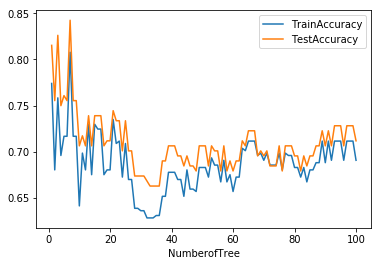

In [50]:
#테스트 결과
ds_accuracy1
#그래프 생성
ds_accuracy1.set_index("NumberofTree",inplace=False).plot.line()

#### 10개정도의 트리 갯수가 테스트셋에서 가장 높은 정확도를 가지고 있다.

In [56]:
# train 및 test 정확도 결과 저장용
train_accuracy = []
test_accuracy = []
# 적용가능한 criterion: gini, entropy
para_max_depth = [i+1 for i in range(20)]*2
n_iter_depth = 20
# criterio 10개씩 리스트 생성
para_criterion = ["gini"]*n_iter_depth + ["entropy"] * n_iter_depth
# criterion: gini, entropy & max_depth: 1~30까지 반복 실행

for (criterion, depth) in zip(para_criterion,para_max_depth):
    rf3 = RandomForestClassifier(criterion = criterion,max_depth=depth, random_state=1234)
    rf3.fit(b_train_x, b_train_y)
    train_accuracy.append(rf3.score(b_train_x, b_train_y))
    test_accuracy.append(rf3.score(b_test_x, b_test_y))
# 저장된 모델의 criterion 및 train/test 데이터 분류 정확도 테이블 생성
ds_accuracy3 = pd.DataFrame()
ds_accuracy3["Criterion"] = para_criterion
ds_accuracy3["Depth"] = para_max_depth
ds_accuracy3["TrainAccuracy"] = train_accuracy
ds_accuracy3["TestAccuracy"] = test_accuracy
#ds_accuracy3.round(5)

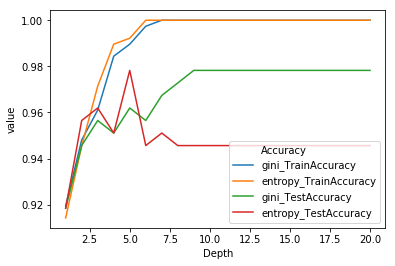

In [57]:
#그래프생성 
accuracy3_melt = pd.melt(ds_accuracy3, id_vars=["Criterion","Depth"])
accuracy3_melt["Accuracy"] = accuracy3_melt["Criterion"] + "_" + accuracy3_melt["variable"]
sns.lineplot( x= "Depth", y="value", hue ="Accuracy", data = accuracy3_melt)

#### entropy index의 깊이 5가 높은 정확성을 보여준다. 깊이 5의 entropy index를 이용하여 모델을 만들어 보겠다.

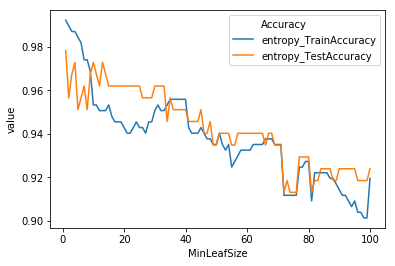

In [58]:
train_accuracy =[]; test_accuracy =[]

n_depth = 5
n_iter_min_leaf_size =100

para_criterion= ["entropy"] *n_iter_min_leaf_size
para_min_leaf_size = [i+1 for i in range(n_iter_min_leaf_size)]

for(criterion,leafsize) in zip(para_criterion, para_min_leaf_size):
    rf4 = RandomForestClassifier(criterion = criterion, max_depth = n_depth, min_samples_leaf = leafsize,random_state = 1234)
    rf4.fit(b_train_x, b_train_y)
    
    train_accuracy.append(rf4.score(b_train_x, b_train_y))
    test_accuracy.append(rf4.score(b_test_x, b_test_y))
accuracy4= pd.DataFrame()
accuracy4["Criterion"] = para_criterion
accuracy4["Depth"] = n_depth
accuracy4["MinLeafSize"] = para_min_leaf_size
accuracy4["TrainAccuracy"] = train_accuracy
accuracy4["TestAccuracy"] = test_accuracy
#그래프
accuracy4_melt = pd.melt(accuracy4, id_vars=["Criterion","Depth","MinLeafSize"])
accuracy4_melt["Accuracy"] = accuracy4_melt["Criterion"] + "_" + accuracy4_melt["variable"]
sns.lineplot( x= "MinLeafSize", y="value", hue ="Accuracy", data = accuracy4_melt)


#### MinLeafSize가 20 미만일경우 높은 정확도를 가지는것으로 보이지만 세밀하게 나눠지기 때문에 모델의 설명이 힘들다고 판단되어 정확도는 조금 낮추지만 MinLeafSize가 큰것으로 선택하는게 나을것이라고 판단된다. MinleafSize는 30개정도가 좋을것으로 판단된다.

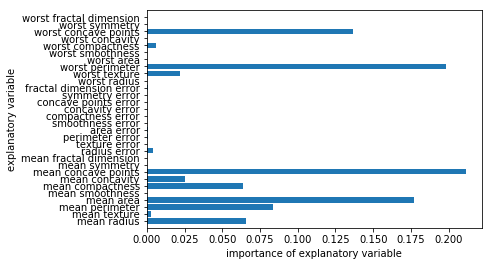

In [40]:
rf_model = RandomForestClassifier(criterion = "gini", max_depth= 5, min_samples_leaf = 30, \
                                  n_estimators = 10, random_state= 1234)
rf_model.fit(b_train_x, b_train_y)

feature_importance = pd.DataFrame()
feature_importance["feature"] = b_train_x.columns
feature_importance["importance"] = rf_model.feature_importances_
feature_importance.sort_values( by = "importance" , ascending = False)

def plot_feature_importance(model):
    n_features = b_train_x.shape[1]
    plt.barh(range(n_features), model.feature_importances_ , align= "center")
    plt.yticks(np.arange(n_features), b_train_x.columns)
    plt.xlabel("importance of explanatory variable")
    plt.ylabel("explanatory variable")
    plt.ylim(-1, n_features)
    
plot_feature_importance(rf_model)

#### 모델에서 가장중요한 변수로 worst perimeter를 가르키고 있다.

In [34]:
finalModel = RandomForestClassifier(criterion = "entropy", max_depth = 5, min_samples_leaf = 30,random_state = 1234)

In [35]:
finalModel.fit(b_train_x,b_train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=30, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=1234, verbose=0,
            warm_start=False)

In [38]:
print("Accuracy: {0:.3f}".format(finalModel.score(b_test_x,b_test_y).round(3)))

Accuracy: 0.962


#### test set 정확도 96%를 가진다. Gridsearch로 모델링 해보겠다.

In [ ]:
##############GridsearchCV
# Choose the type of classifier. 
# Choose some parameter combinations to try
parameters = { 
              #'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': list(i for i in range(1,3)), 
              'min_samples_leaf': list(i for i in range(1,180)),
              '
             }

# Type of scoring used to compare parameter combinations
#acc_scorer = make_scorer(accuracy_score)

# Run the grid search
grid_obj = GridSearchCV(tree_uncustomized, parameters)
grid_obj = grid_obj.fit(b_train_x, b_train_y)

# Set the clf to the best combination of parameterstree_uncustomized
searchcv = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
searchcv.fit(b_train_x, b_train_y)